# Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib as map
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Data Import

In [23]:
#Creating an empty dataframe.
df = pd.DataFrame()
#Printing shape of the dataframe
print(df.shape)

(0, 0)


We are creating a function to import the data and append all the data to the environment data frame.

In [24]:
def read_merge_data (file_path):
    global df
    var_tab = pq.read_table(file_path)
    temp_df = var_tab.to_pandas()
    df = df.append(temp_df, ignore_index = True)
    print(f"{df.shape} records hvae been appended")

In [25]:
#Creating a list of all the files that needs to be imported
file_name = [
    '/work/green_tripdata_2022-01.parquet',
    '/work/green_tripdata_2022-02.parquet',
    '/work/green_tripdata_2022-03.parquet',
    '/work/green_tripdata_2022-04.parquet',
    '/work/green_tripdata_2022-05.parquet',
    '/work/green_tripdata_2022-06.parquet',
    '/work/green_tripdata_2022-07.parquet',
    '/work/green_tripdata_2022-08.parquet',
    '/work/green_tripdata_2022-09.parquet',
    '/work/green_tripdata_2022-10.parquet',
    '/work/green_tripdata_2022-11.parquet',
    '/work/green_tripdata_2022-12.parquet',
    '/work/green_tripdata_2023-01.parquet'
    ]

In [26]:
#Calling the defined function [read_merge(file_path)] to import data
for i in file_name:
    print(f"Loading {i} file.")
    read_merge_data(i)
    print(f"-----------------------------------File Loaded {i} ----------------------------------------")


Loading /work/green_tripdata_2022-01.parquet file.
(62495, 20) records hvae been appended
-----------------------------------File Loaded /work/green_tripdata_2022-01.parquet ----------------------------------------
Loading /work/green_tripdata_2022-02.parquet file.
(131894, 20) records hvae been appended
-----------------------------------File Loaded /work/green_tripdata_2022-02.parquet ----------------------------------------
Loading /work/green_tripdata_2022-03.parquet file.
(210431, 20) records hvae been appended
-----------------------------------File Loaded /work/green_tripdata_2022-03.parquet ----------------------------------------
Loading /work/green_tripdata_2022-04.parquet file.
(286567, 20) records hvae been appended
-----------------------------------File Loaded /work/green_tripdata_2022-04.parquet ----------------------------------------
Loading /work/green_tripdata_2022-05.parquet file.
(363458, 20) records hvae been appended
-----------------------------------File Loaded

In [27]:
taxizonefilepath = '/work/taxi+_zone_lookup.csv'
taxizone_df = pd.read_csv(taxizonefilepath)
print(taxizone_df.shape)
print(taxizone_df.info())
taxizone_df.head(5)

(265, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB
None


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [28]:
holidaysfilepath = '/work/Holidays.csv'
holidays_df = pd.read_csv(holidaysfilepath)
print(holidays_df.shape)
print(holidays_df.info())
holidays_df.head(5)

(13, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Holidays  13 non-null     object
dtypes: object(1)
memory usage: 232.0+ bytes
None


,Holidays
0,01-01-2022
1,01/17/2022
2,02/21/2022
3,05/30/2022
4,07/04/2022


# Data Exploration

Dimensions of dataset: rows and columns

In [29]:
df.shape

(908613, 20)

In [30]:
taxizone_df.shape

(265, 4)

In [31]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


In [32]:
df.tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
908608,2,2023-01-31 22:29:00,2023-01-31 22:42:00,None,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,None,1.0,16.70,NaN,NaN,NaN
908609,2,2023-01-31 22:40:00,2023-01-31 22:48:00,None,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,None,1.0,5.41,NaN,NaN,NaN
908610,2,2023-01-31 23:46:00,2023-02-01 00:02:00,None,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,None,1.0,21.04,NaN,NaN,NaN
908611,2,2023-01-31 23:01:00,2023-01-31 23:19:00,None,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,None,1.0,19.18,NaN,NaN,NaN
908612,2,2023-01-31 23:51:00,2023-02-01 00:07:00,None,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,None,1.0,29.40,NaN,NaN,NaN


In [33]:
taxizone_df.head(5)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [34]:
taxizone_df.tail(5)

,LocationID,Borough,Zone,service_zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN
264,265,Unknown,NaN,NaN


Datatype of each column

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908613 entries, 0 to 908612
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               908613 non-null  int64         
 1   lpep_pickup_datetime   908613 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  908613 non-null  datetime64[ns]
 3   store_and_fwd_flag     813949 non-null  object        
 4   RatecodeID             813949 non-null  float64       
 5   PULocationID           908613 non-null  int64         
 6   DOLocationID           908613 non-null  int64         
 7   passenger_count        813949 non-null  float64       
 8   trip_distance          908613 non-null  float64       
 9   fare_amount            908613 non-null  float64       
 10  extra                  908613 non-null  float64       
 11  mta_tax                908613 non-null  float64       
 12  tip_amount             908613 non-null  floa

In [36]:
taxizone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [37]:
X= df.drop('fare_amount',axis = 1)
y = df['fare_amount']

<AxesSubplot: >

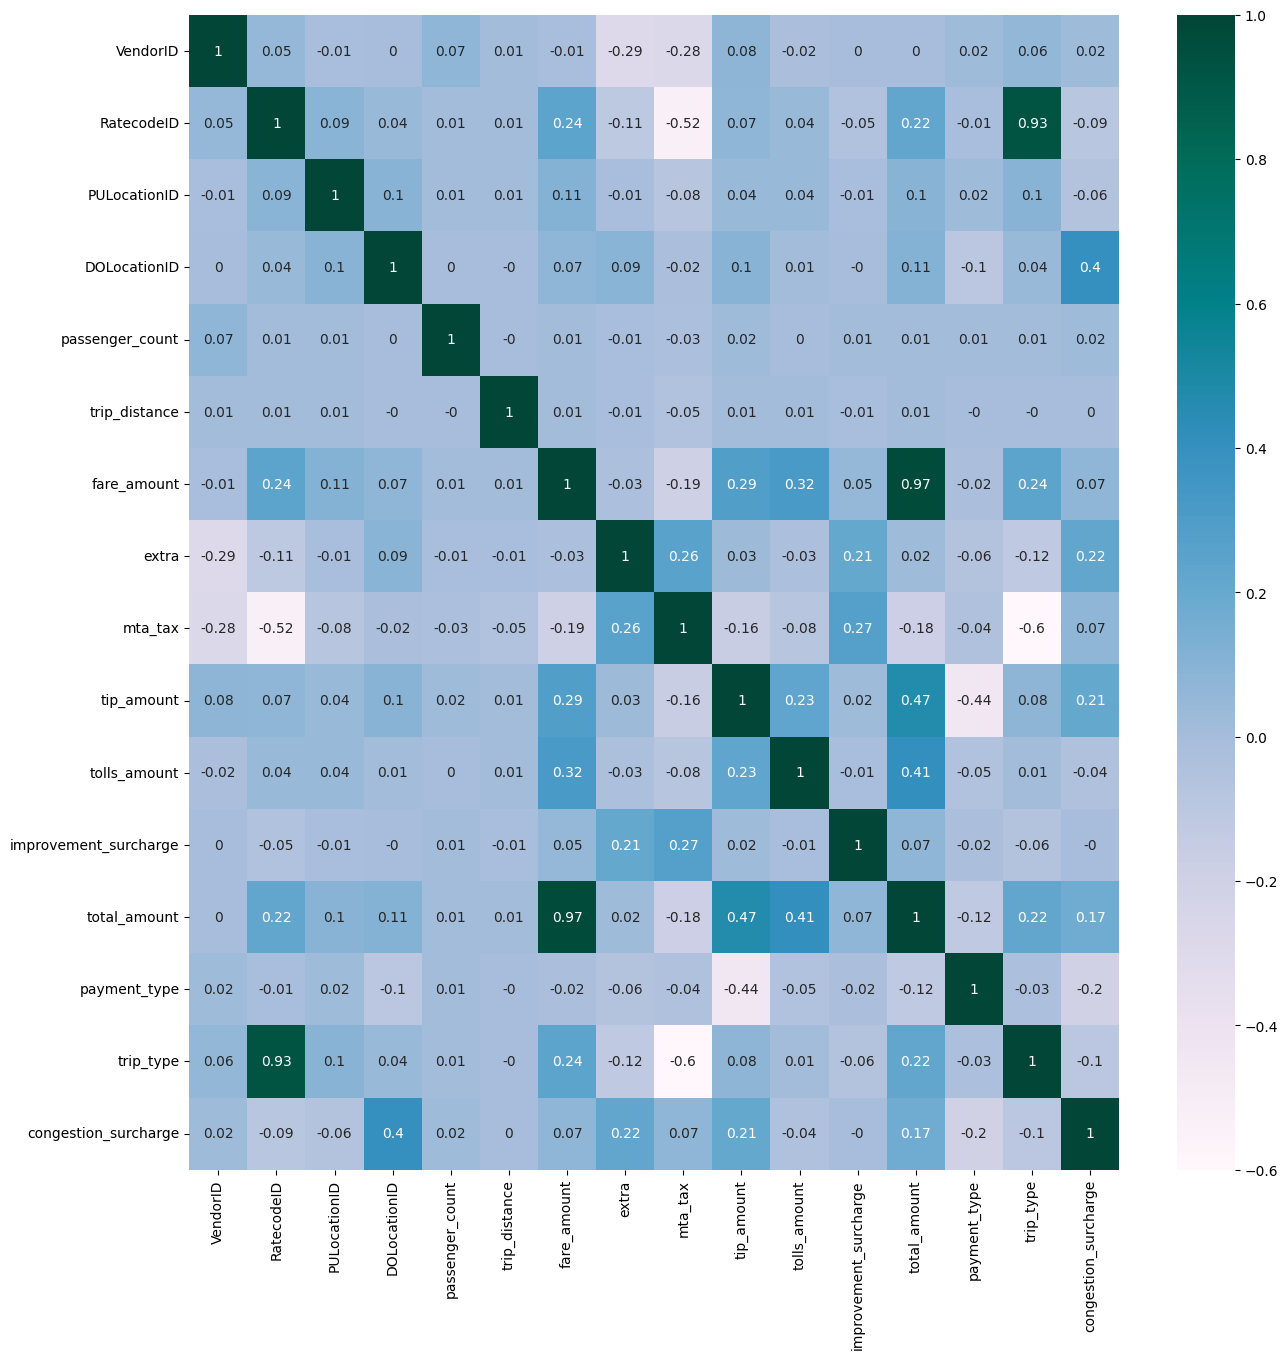

In [38]:
import matplotlib.pyplot as py
fig, ax =  py.subplots(figsize=(15,15))
sns.heatmap(round(df.corr(),2), annot=True, cmap='PuBuGn')

# Data Pre-processing

Merging Taxizone Data for Pickup.

In [39]:
#Pickup Location Zone Merge
df = df.merge(taxizone_df,how='left',left_on='PULocationID',right_on='LocationID')
df.drop(columns = ['LocationID'],axis = 1,inplace  = True)
df.rename(columns = {'Borough' : 'pickup_borough', 'Zone' : 'pickup_zone', 'service_zone' : 'pickup_service_zone'},inplace = True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.50,...,0.0,None,0.3,4.80,2.0,1.0,0.00,Manhattan,Central Harlem North,Boro Zone
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.50,...,0.0,None,0.3,10.80,2.0,1.0,0.00,Manhattan,Hamilton Heights,Boro Zone
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.50,...,0.0,None,0.3,23.15,1.0,1.0,2.75,Manhattan,Central Harlem,Boro Zone
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.00,...,0.0,None,0.3,9.30,2.0,1.0,0.00,Brooklyn,Park Slope,Boro Zone
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.00,...,0.0,None,0.3,31.26,1.0,1.0,2.75,Brooklyn,Brooklyn Heights,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908608,2,2023-01-31 22:29:00,2023-01-31 22:42:00,None,NaN,49,62,NaN,4070.82,15.70,...,0.0,None,1.0,16.70,NaN,NaN,NaN,Brooklyn,Clinton Hill,Boro Zone
908609,2,2023-01-31 22:40:00,2023-01-31 22:48:00,None,NaN,10,205,NaN,2.14,4.41,...,0.0,None,1.0,5.41,NaN,NaN,NaN,Queens,Baisley Park,Boro Zone
908610,2,2023-01-31 23:46:00,2023-02-01 00:02:00,None,NaN,66,37,NaN,3.44,16.53,...,0.0,None,1.0,21.04,NaN,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Boro Zone
908611,2,2023-01-31 23:01:00,2023-01-31 23:19:00,None,NaN,225,189,NaN,3.03,14.98,...,0.0,None,1.0,19.18,NaN,NaN,NaN,Brooklyn,Stuyvesant Heights,Boro Zone


Merging Taxizone Data for Dropoff.

In [40]:
#Pickup Location Zone Merge
df = df.merge(taxizone_df,how='left',left_on='DOLocationID',right_on='LocationID')
df.drop(columns = ['LocationID'],axis = 1,inplace  = True)
df.rename(columns = {'Borough' : 'drop_borough', 'Zone' : 'drop_zone', 'service_zone' : 'drop_service_zone'},inplace = True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,drop_borough,drop_zone,drop_service_zone
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.50,...,4.80,2.0,1.0,0.00,Manhattan,Central Harlem North,Boro Zone,Manhattan,Central Harlem North,Boro Zone
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.50,...,10.80,2.0,1.0,0.00,Manhattan,Hamilton Heights,Boro Zone,Manhattan,Central Harlem,Boro Zone
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.50,...,23.15,1.0,1.0,2.75,Manhattan,Central Harlem,Boro Zone,Manhattan,Lenox Hill East,Yellow Zone
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.00,...,9.30,2.0,1.0,0.00,Brooklyn,Park Slope,Boro Zone,Brooklyn,Park Slope,Boro Zone
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.00,...,31.26,1.0,1.0,2.75,Brooklyn,Brooklyn Heights,Boro Zone,Manhattan,Murray Hill,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908608,2,2023-01-31 22:29:00,2023-01-31 22:42:00,None,NaN,49,62,NaN,4070.82,15.70,...,16.70,NaN,NaN,NaN,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Crown Heights South,Boro Zone
908609,2,2023-01-31 22:40:00,2023-01-31 22:48:00,None,NaN,10,205,NaN,2.14,4.41,...,5.41,NaN,NaN,NaN,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone
908610,2,2023-01-31 23:46:00,2023-02-01 00:02:00,None,NaN,66,37,NaN,3.44,16.53,...,21.04,NaN,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone
908611,2,2023-01-31 23:01:00,2023-01-31 23:19:00,None,NaN,225,189,NaN,3.03,14.98,...,19.18,NaN,NaN,NaN,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone


Dropping all unwanted columns

In [41]:
df.drop(columns = ['store_and_fwd_flag','ehail_fee','trip_type','payment_type','passenger_count'],inplace = True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908613 entries, 0 to 908612
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               908613 non-null  int64         
 1   lpep_pickup_datetime   908613 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  908613 non-null  datetime64[ns]
 3   RatecodeID             813949 non-null  float64       
 4   PULocationID           908613 non-null  int64         
 5   DOLocationID           908613 non-null  int64         
 6   trip_distance          908613 non-null  float64       
 7   fare_amount            908613 non-null  float64       
 8   extra                  908613 non-null  float64       
 9   mta_tax                908613 non-null  float64       
 10  tip_amount             908613 non-null  float64       
 11  tolls_amount           908613 non-null  float64       
 12  improvement_surcharge  908613 non-null  floa

Checking for NULL/NA values

In [43]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
RatecodeID               94664
PULocationID                 0
DOLocationID                 0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     94664
pickup_borough               0
pickup_zone               1115
pickup_service_zone       4068
drop_borough                 0
drop_zone                 4216
drop_service_zone        13292
dtype: int64

Handling missing values

In [44]:
df = df.dropna()

In [45]:
taxizone_df.isna().sum()

LocationID      0
Borough         0
Zone            1
service_zone    2
dtype: int64

In [46]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
RatecodeID               0
PULocationID             0
DOLocationID             0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_borough           0
pickup_zone              0
pickup_service_zone      0
drop_borough             0
drop_zone                0
drop_service_zone        0
dtype: int64

In [47]:
df.shape

(800698, 21)

In [48]:
taxizone_df = taxizone_df.dropna()
taxizone_df.isna().sum()

LocationID      0
Borough         0
Zone            0
service_zone    0
dtype: int64

In [49]:
taxizone_df.shape

(263, 4)

Handling outliers for the trip distance attribute

In [50]:
num_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']

<AxesSubplot: >

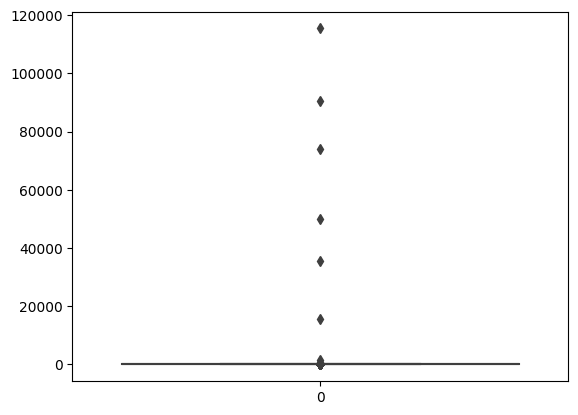

In [51]:
sns.boxplot(df['trip_distance'])

In [52]:
df.trip_distance.describe()

count    800698.000000
mean          3.296183
std         196.829869
min           0.000000
25%           1.110000
50%           1.900000
75%           3.410000
max      115402.900000
Name: trip_distance, dtype: float64

In [67]:
#Filtering all the rows where distance is less than 1 mile
df = df[df['trip_distance'] > 0]

In [53]:
#Data Processing
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# Set upper and lower bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Filter out values outside of bounds
df = df[(df['trip_distance'] >= lower_bound) & (df['trip_distance'] <= upper_bound)]

<AxesSubplot: >

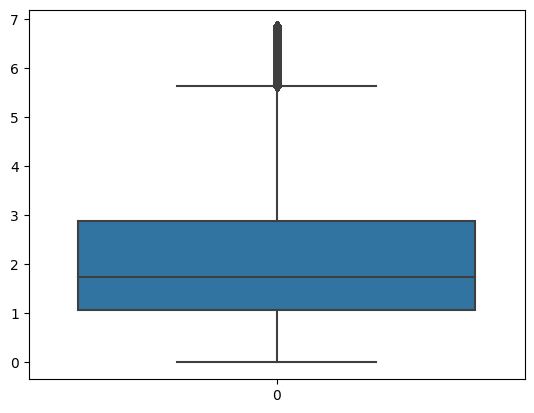

In [54]:
sns.boxplot(df['trip_distance'])

Outliers for Fare

In [55]:
df.fare_amount.describe()

count    735403.000000
mean         12.189932
std          10.318159
min        -350.080000
25%           7.000000
50%          10.000000
75%          15.000000
max         595.500000
Name: fare_amount, dtype: float64

<AxesSubplot: >

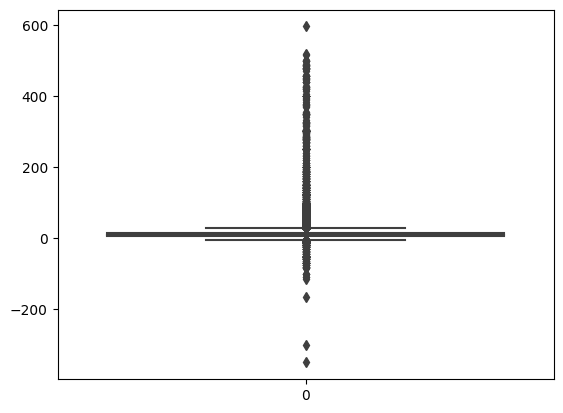

In [56]:
sns.boxplot(df['fare_amount'])

In [57]:
#Filtering all the rows where the amount is less than $3 as it is the base fare.
#Ref for base fare--> https://www.nyc.gov/site/tlc/passengers/taxi-fare.page
df = df[df['fare_amount'] > 3]

In [58]:
df['fare_amount'].describe()

count    719057.000000
mean         12.441795
std          10.243621
min           3.150000
25%           7.500000
50%          10.500000
75%          15.000000
max         595.500000
Name: fare_amount, dtype: float64

<AxesSubplot: >

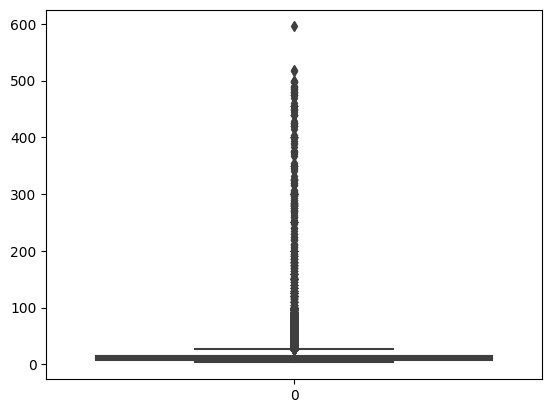

In [59]:
sns.boxplot(df['fare_amount'])

In [60]:
#Dropping all the rows where fare_amount is between 1st and 3rd Quartile
#Data Processing
Q1 = df['fare_amount'].quantile(0.025)
Q3 = df['fare_amount'].quantile(0.975)
IQR = Q3 - Q1
print(IQR)
# Set upper and lower bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(lower_bound)
print(upper_bound)
# Filter out values outside of bounds
df = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]

26.5
-35.25
70.75


<AxesSubplot: >

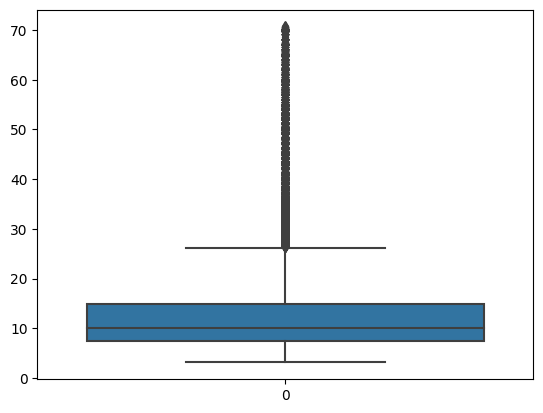

In [61]:
sns.boxplot(df['fare_amount'])

Calculating the Trip Time

In [62]:
#Renaming pickup and dropoff date columns
df = df.rename(columns={'lpep_pickup_datetime': 'pickup_datetime','lpep_dropoff_datetime': 'dropoff_datetime'})

In [63]:
#Calculating trip time in minutes
df['trip_time'] = round((df['dropoff_datetime'] - df['pickup_datetime']) / np.timedelta64(60,'s'),2)

In [64]:
df['trip_time'].describe()

count    717624.000000
mean         17.563987
std          74.834294
min         -54.020000
25%           7.320000
50%          11.270000
75%          16.720000
max        1439.920000
Name: trip_time, dtype: float64

<AxesSubplot: >

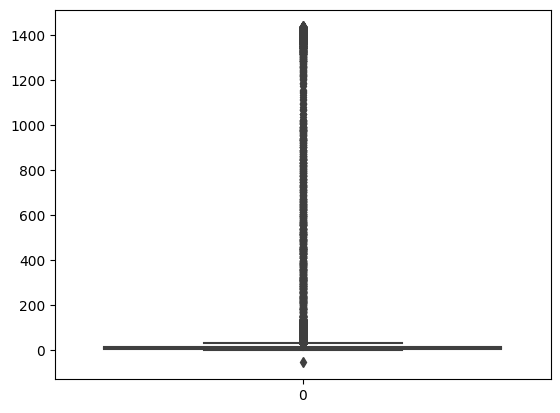

In [65]:
sns.boxplot(df['trip_time'])

In [71]:
#Filtering all the rows where time is less than 1 mins
df = df[df['trip_time'] > 1]

In [ ]:
from scipy import stats

z_scores = stats.zscore(df['trip_distance'])

# Set threshold for z-score
threshold = 3

# Filter out values with z-scores above threshold
df = df[(np.abs(z_scores) < threshold)]

<AxesSubplot: >

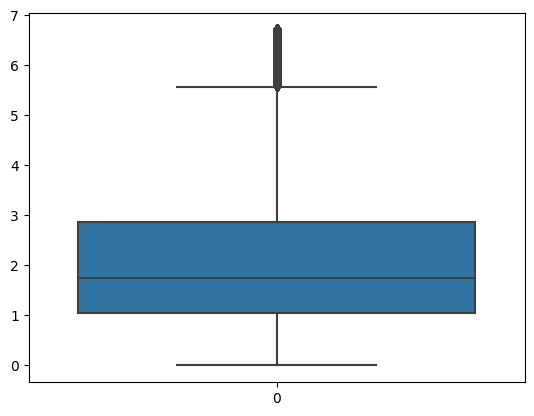

In [ ]:
sns.boxplot(df['trip_distance'])

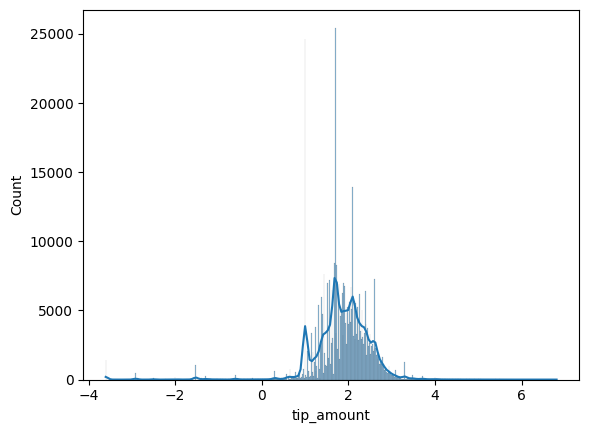

In [ ]:
sns.histplot(np.log(df['tip_amount'])+1, kde=True)
plt.show()

Histogram plot for total_amount of trips

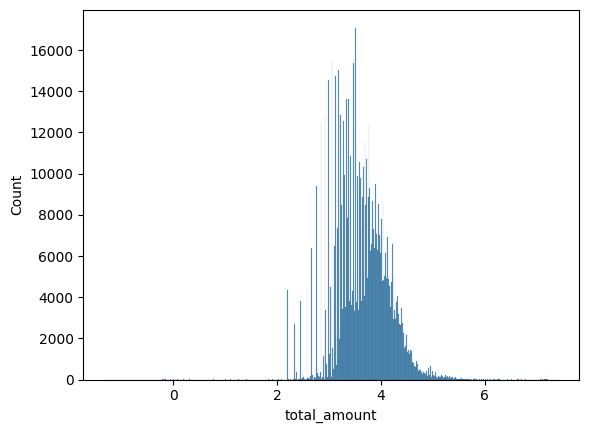

In [ ]:
sns.histplot(np.log(df['total_amount'])+1, kde=False)
plt.show()

<AxesSubplot: xlabel='trip_distance', ylabel='fare_amount'>

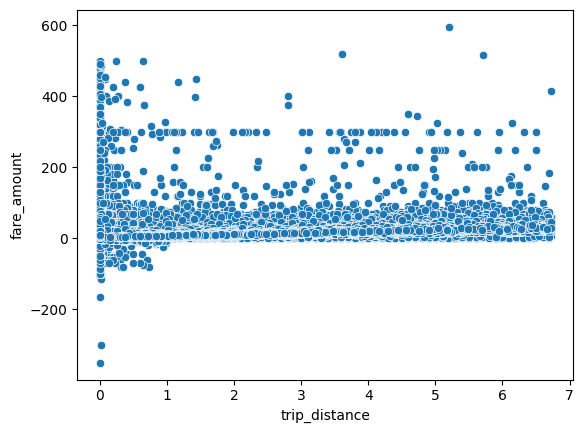

In [ ]:
sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
#plt.show()

In [ ]:
# Analyze the temporal aspects of the data
#df['pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
#df['dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
#sns.lineplot(x='pickup_datetime', y='total_amount', data=df)
#plt.title('Total Amount Over Time')
#plt.show()

Text(0.5, 1.0, 'Pickup Hour')

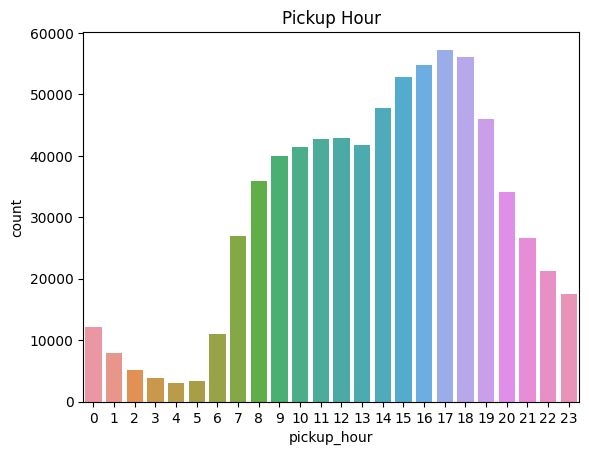

In [ ]:
sns.countplot(x='pickup_hour', data=df)
plt.title('Pickup Hour')
#plt.show()

Text(0.5, 1.0, 'Pickup Day of Week')

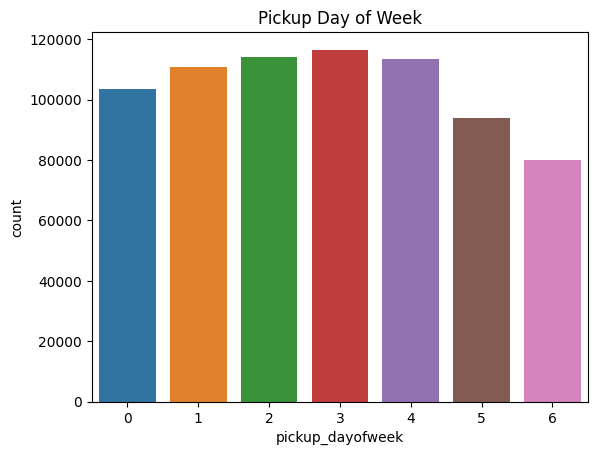

In [ ]:
sns.countplot(x='pickup_dayofweek', data=df)
plt.title('Pickup Day of Week')
#plt.show()

In [ ]:
print(df[['PULocationID', 'DOLocationID']].value_counts().head(10))

PULocationID  DOLocationID
74            75              20103
75            74              18059
74            236             12304
              41              11160
95            95              10323
74            74               9910
              166              9854
              42               9001
75            75               8881
74            263              8691
dtype: int64


Text(0.5, 1.0, 'Total Amount Over Hours')

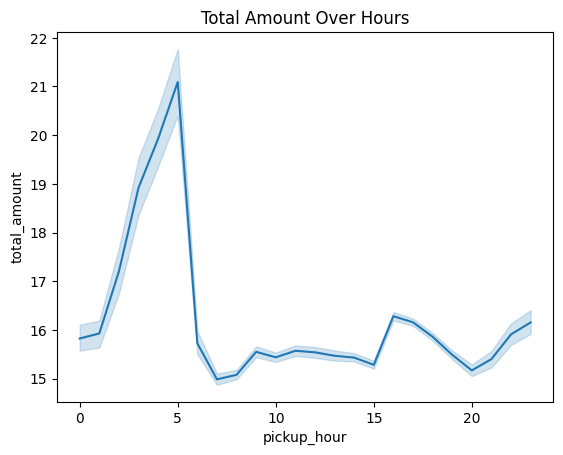

In [ ]:
sns.lineplot(x='pickup_hour', y='total_amount', data=df)
plt.title('Total Amount Over Hours')
#plt.show()

Text(0.5, 1.0, 'Total Amount Over Time')

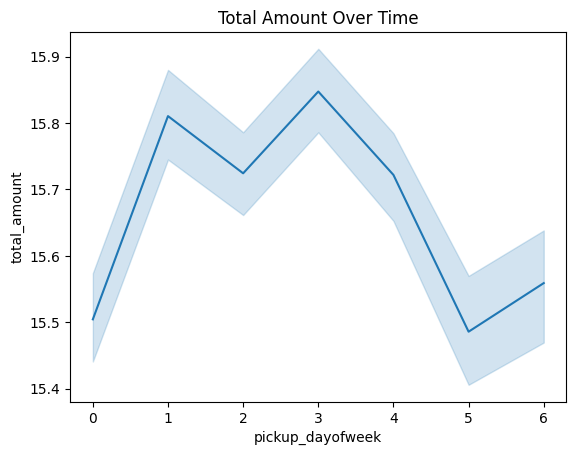

In [ ]:
sns.lineplot(x='pickup_dayofweek', y='total_amount', data=df)
plt.title('Total Amount Over Time')
#plt.show()

Text(0.5, 1.0, 'Pickup LocationID')

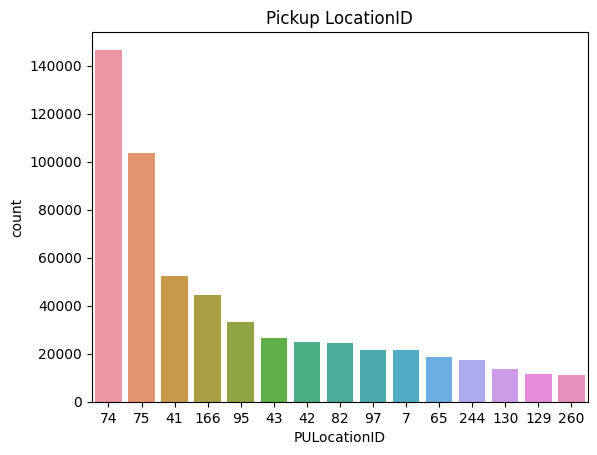

In [ ]:
sns.countplot(x='PULocationID', data=df, order=df.PULocationID.value_counts().iloc[:15].index)
plt.title('Pickup LocationID')
#plt.show()

<AxesSubplot: xlabel='DOLocationID', ylabel='count'>

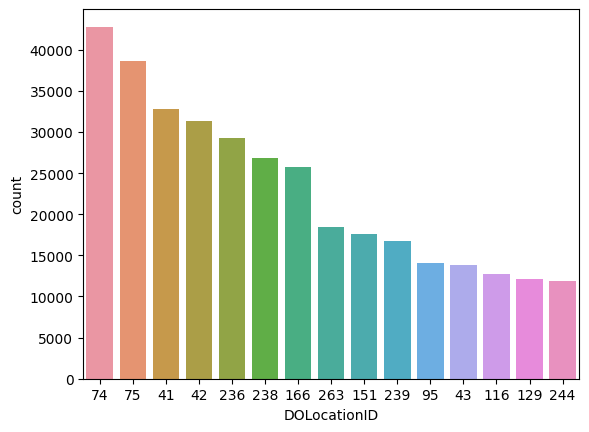

In [ ]:
sns.countplot(x='DOLocationID', data=df,order=df.DOLocationID.value_counts().iloc[:15].index)
#plt.title('Drop LocationID')

Text(0.5, 1.0, 'VendorID')

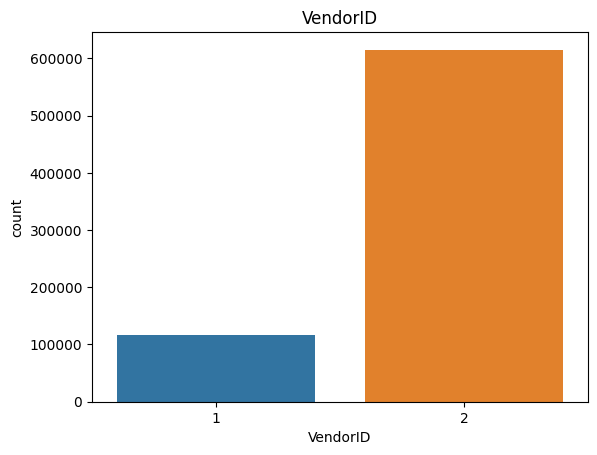

In [ ]:
sns.countplot(x='VendorID', data=df)
plt.title('VendorID')

Text(0.5, 1.0, 'RateCodeID')

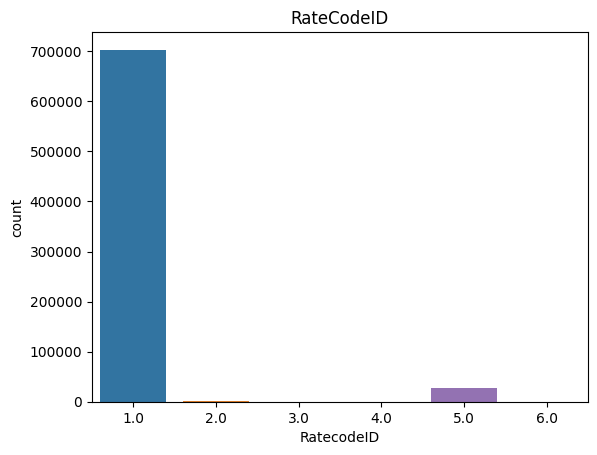

In [ ]:
sns.countplot(x='RatecodeID', data=df)
plt.title('RateCodeID')

Text(0.5, 1.0, 'passenger_count')

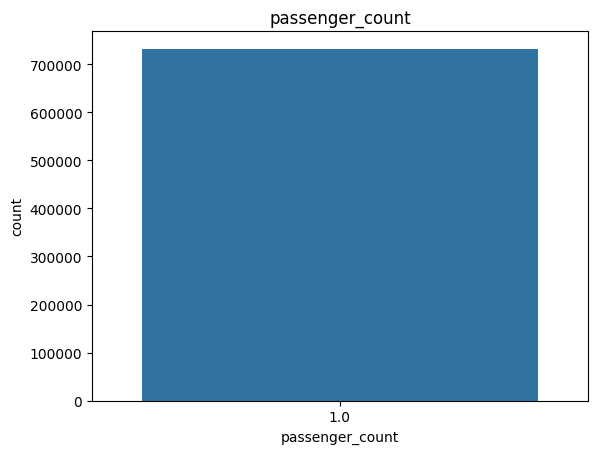

In [ ]:
sns.countplot(x=df['passenger_count'], data=df['passenger_count'])
plt.title('passenger_count')

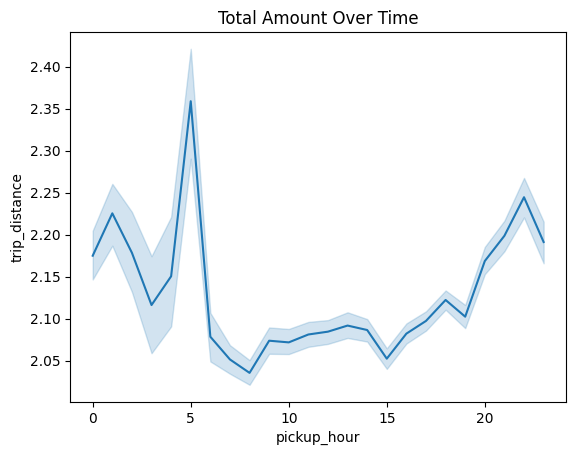

In [ ]:
sns.lineplot(x='pickup_hour', y='trip_distance', data=df)
plt.title('Total Amount Over Time')
plt.show()

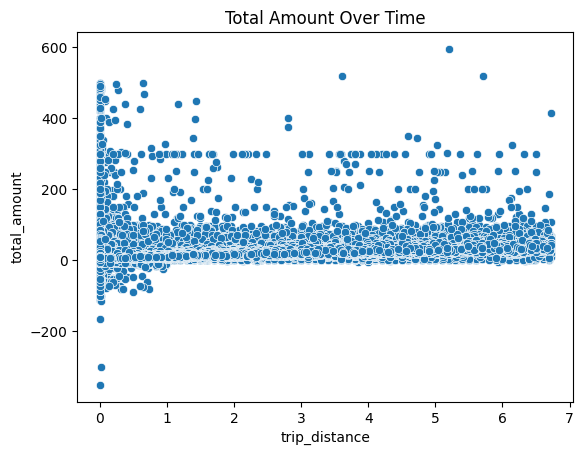

In [ ]:
sns.scatterplot(y='total_amount', x='trip_distance', data=df)
plt.title('Total Amount Over Time')
plt.show()

Text(0.5, 1.0, 'Modes of Payment')

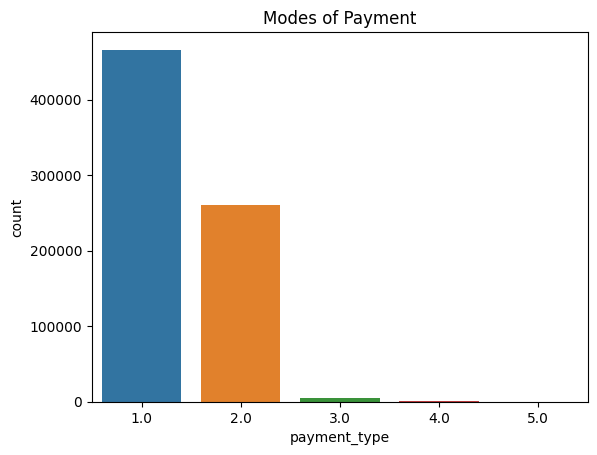

In [ ]:
sns.countplot(x='payment_type', data=df)
plt.title('Modes of Payment')

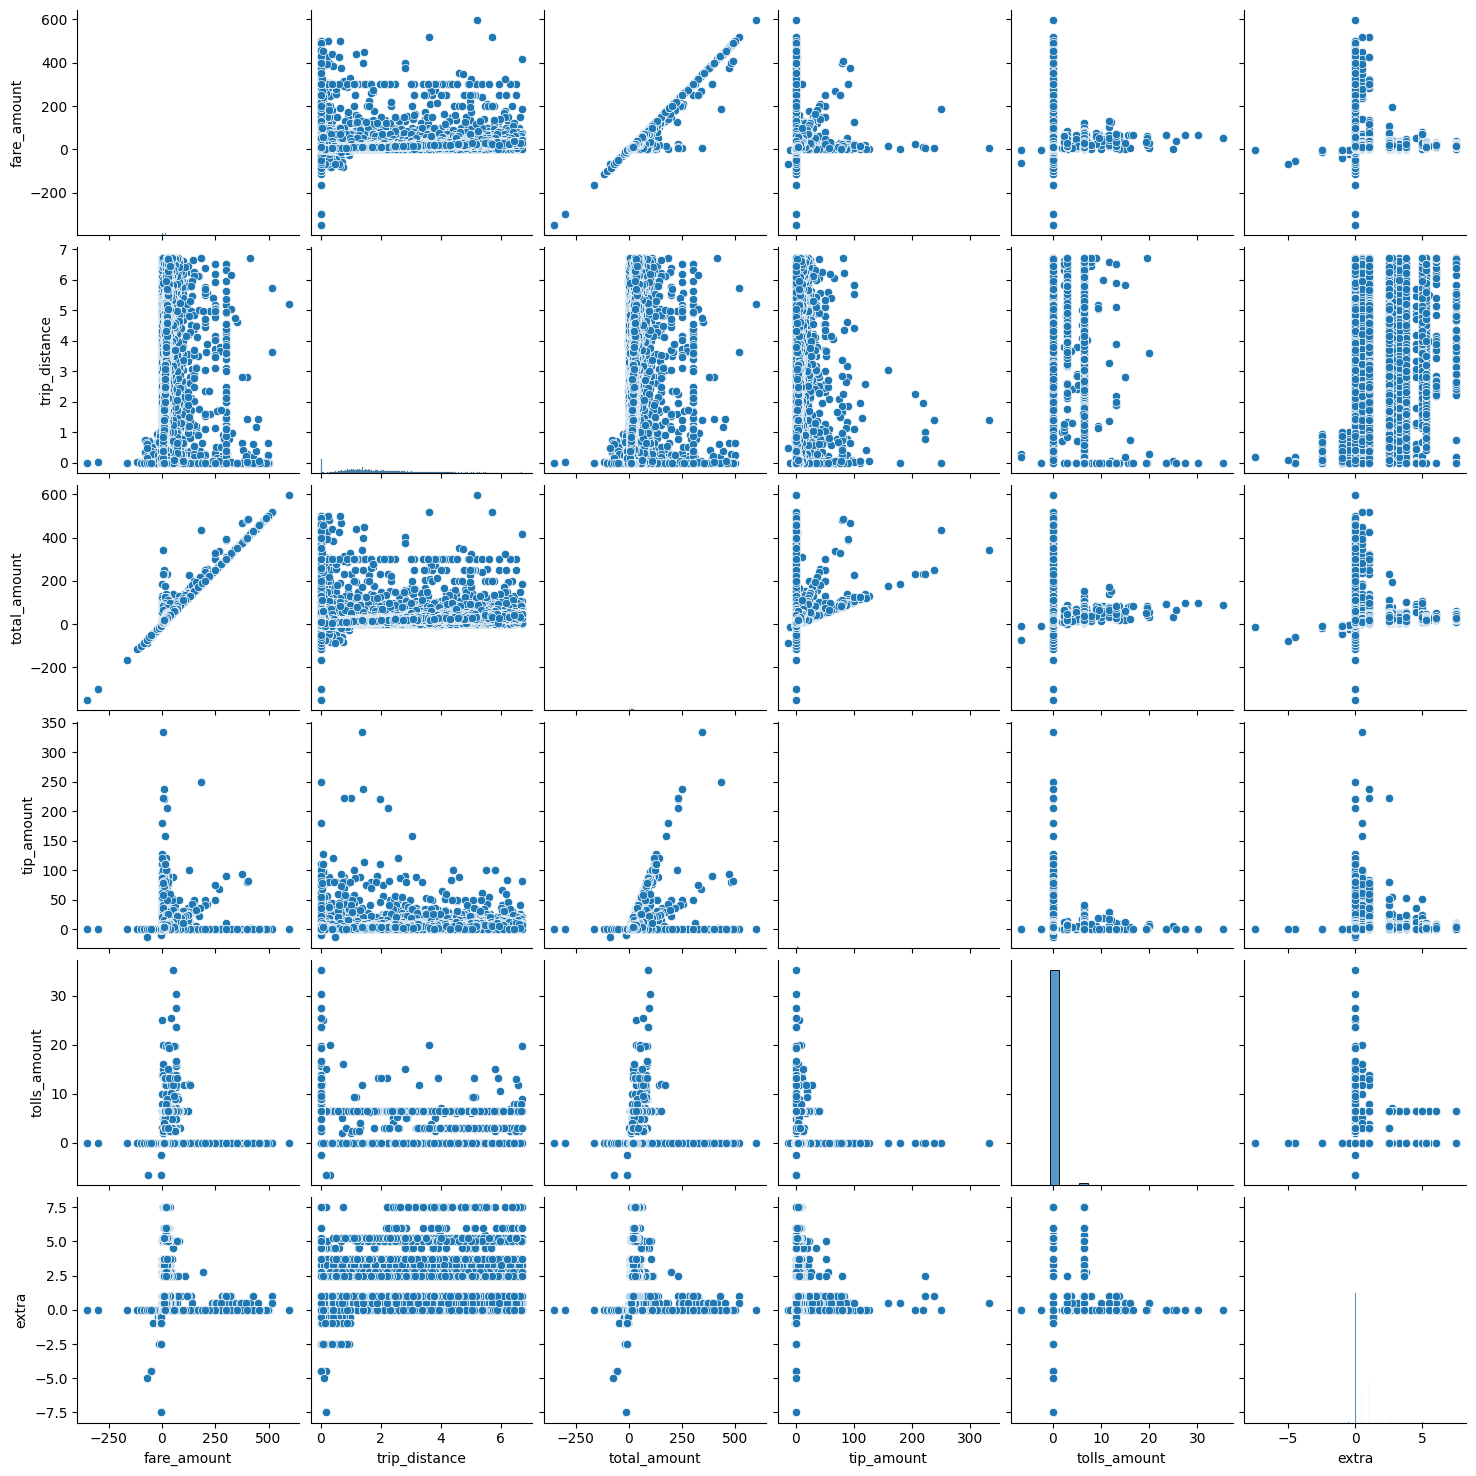

In [ ]:
sns.pairplot(df[['fare_amount','trip_distance','total_amount','tip_amount','tolls_amount','extra']])

Text(0.5, 1.0, 'Trip Type')

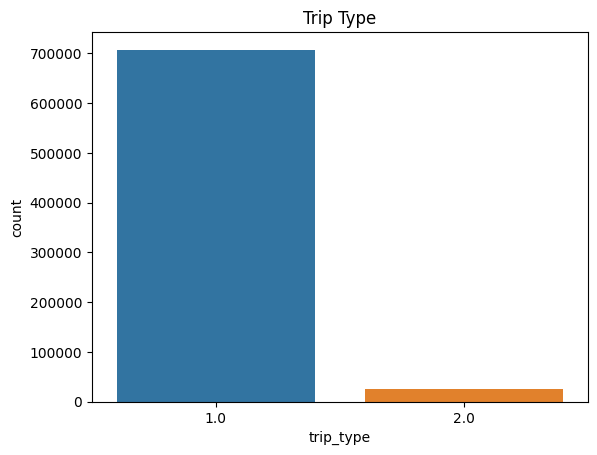

In [ ]:
sns.countplot(x='trip_type', data=df)
plt.title('Trip Type')

Text(0.5, 1.0, 'Number of Trips by an hour of the Day')

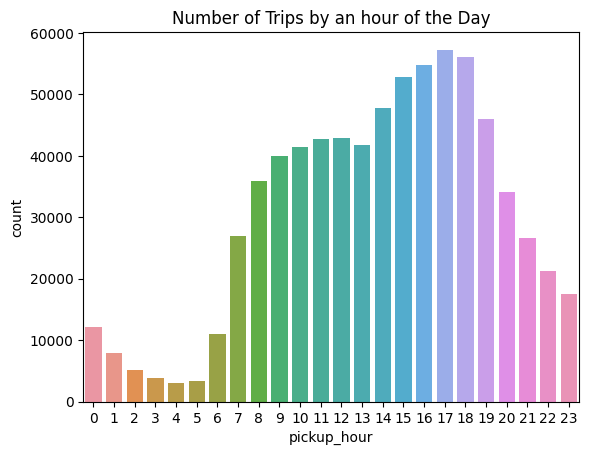

In [ ]:
sns.countplot(x='pickup_hour', data=df)
plt.title('Number of Trips by an hour of the Day')

Text(0.5, 1.0, 'Number of Trips by Day of Week')

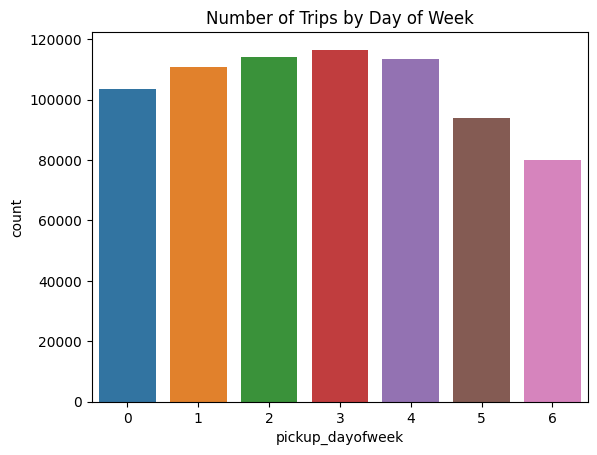

In [ ]:
sns.countplot(x='pickup_dayofweek', data=df)
plt.title('Number of Trips by Day of Week')

Text(0.5, 1.0, 'Number of Trips by Day of Week')

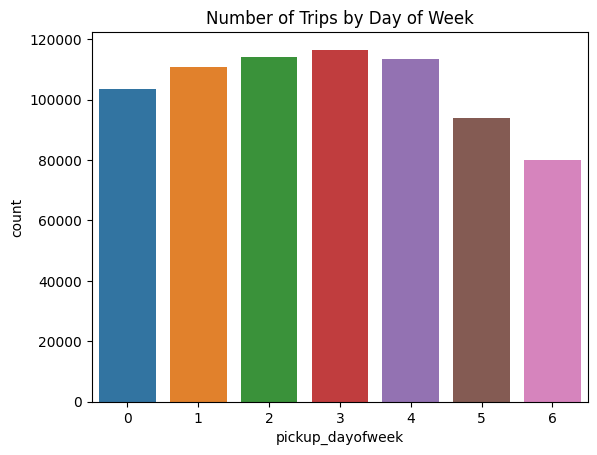

In [ ]:
sns.countplot(x='pickup_dayofweek', data=df)
plt.title('Number of Trips by Day of Week')

Correlation matrix

In [ ]:
df[['dropoff_datetime','pickup_datetime','TripTime']]

,dropoff_datetime,pickup_datetime,TripTime
0,2022-01-01 00:15:33,2022-01-01 00:14:21,1.20
1,2022-01-01 00:29:38,2022-01-01 00:20:55,8.72
2,2022-01-01 01:13:14,2022-01-01 00:57:02,16.20
3,2022-01-01 00:15:57,2022-01-01 00:07:42,8.25
4,2022-01-01 00:28:52,2022-01-01 00:07:50,21.03
...,...,...,...
904284,2023-01-31 23:17:21,2023-01-31 23:09:22,7.98
904285,2023-01-31 23:17:03,2023-01-31 23:06:18,10.75
904286,2023-01-31 23:23:04,2023-01-31 23:17:03,6.02
904287,2023-01-31 23:38:50,2023-01-31 23:29:18,9.53


In [ ]:
# Adding peak_hours as [18,19,20]
df['peak_hours'] = df['pickup_hour'].apply(lambda x: 1 if x in [8,9,10,17,18,19] else 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732045 entries, 0 to 904288
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               732045 non-null  int64         
 1   lpep_pickup_datetime   732045 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  732045 non-null  datetime64[ns]
 3   RatecodeID             732045 non-null  float64       
 4   PULocationID           732045 non-null  int64         
 5   DOLocationID           732045 non-null  int64         
 6   passenger_count        732045 non-null  float64       
 7   trip_distance          732045 non-null  float64       
 8   fare_amount            732045 non-null  float64       
 9   extra                  732045 non-null  float64       
 10  mta_tax                732045 non-null  float64       
 11  tip_amount             732045 non-null  float64       
 12  tolls_amount           732045 non-null  floa

<AxesSubplot: >

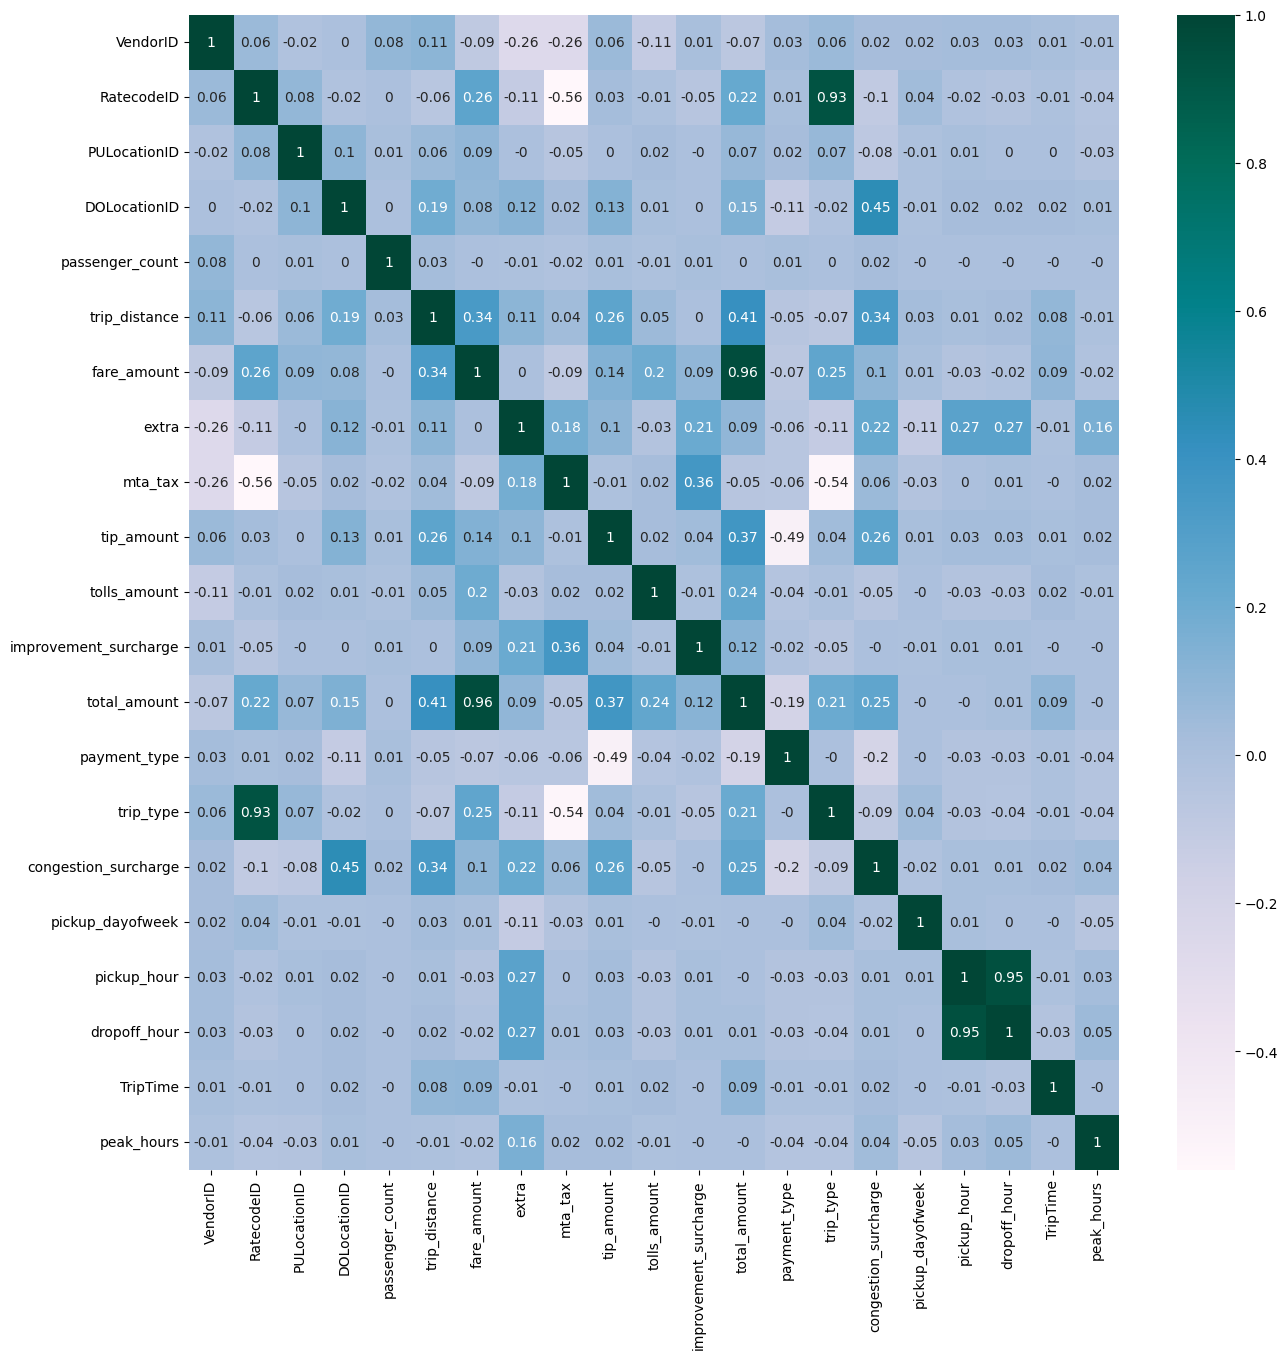

In [ ]:
import matplotlib.pyplot as py
fig, ax =  py.subplots(figsize=(15,15))
sns.heatmap(round(df.corr(),2), annot=True, cmap='PuBuGn')

In [ ]:
df.head(1)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,drop_borough,drop_zone,drop_service_zone,pickup_datetime,dropoff_datetime,pickup_dayofweek,pickup_hour,dropoff_hour,TripTime,peak_hours
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,1.0,42,42,1.0,0.44,3.5,0.5,...,Manhattan,Central Harlem North,Boro Zone,2022-01-01 00:14:21,2022-01-01 00:15:33,5,0,0,1.2,0


In [ ]:
y = df['fare_amount']
X = df[['PULocationID','DOLocationID','trip_distance','pickup_hour','dropoff_hour','peak_hours','pickup_dayofweek','TripTime']]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

,PULocationID,DOLocationID,trip_distance,pickup_hour,dropoff_hour,peak_hours,pickup_dayofweek,TripTime
456971,33,80,4.23,13,13,0,1,18.18
538192,36,49,3.54,23,0,0,4,19.68
574145,95,95,1.05,15,15,0,6,5.98
249063,41,166,1.12,13,13,0,0,6.48
573270,93,93,0.18,22,22,0,5,0.05
...,...,...,...,...,...,...,...,...
462322,70,223,2.36,5,5,0,4,8.50
611661,7,223,1.18,14,14,0,3,16.18
588856,41,116,1.98,15,16,0,6,10.28
612203,130,197,2.20,17,17,1,3,11.73


In [ ]:
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression

a = LinearRegression()
a.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred = a.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('Mean Squared Error:',mse)
print('R-squared:',r2)

Mean Squared Error: 95.42321408565157
R-squared: 0.12116616185033557


In [ ]:
df['TripTime'].sort_values(ascending = True)

716382     -54.02
366766       0.00
134854       0.00
613273       0.00
392682       0.00
           ...   
736417    1439.82
112238    1439.85
866805    1439.88
331368    1439.92
368421    1439.95
Name: TripTime, Length: 732045, dtype: float64

In [ ]:
df[df['TripTime'] >= 1439.82]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,drop_borough,drop_zone,drop_service_zone,pickup_datetime,dropoff_datetime,pickup_dayofweek,pickup_hour,dropoff_hour,TripTime,peak_hours
112238,2,2022-02-23 15:12:31,2022-02-24 15:12:22,1.0,166,42,1.0,1.51,8.5,0.0,...,Manhattan,Central Harlem North,Boro Zone,2022-02-23 15:12:31,2022-02-24 15:12:22,2,15,15,1439.85,0
331368,2,2022-05-21 12:09:08,2022-05-22 12:09:03,1.0,75,74,1.0,0.53,4.0,0.0,...,Manhattan,East Harlem North,Boro Zone,2022-05-21 12:09:08,2022-05-22 12:09:03,5,12,12,1439.92,0
368421,2,2022-06-03 09:20:53,2022-06-04 09:20:50,1.0,193,193,1.0,0.00,3.0,0.0,...,Queens,Queensbridge/Ravenswood,Boro Zone,2022-06-03 09:20:53,2022-06-04 09:20:50,4,9,9,1439.95,1
736417,2,2022-11-16 21:01:46,2022-11-17 21:01:35,1.0,196,82,1.0,4.97,27.5,0.5,...,Queens,Elmhurst,Boro Zone,2022-11-16 21:01:46,2022-11-17 21:01:35,2,21,21,1439.82,0
866805,2,2023-01-13 22:13:15,2023-01-14 22:13:08,1.0,193,7,1.0,0.00,0.0,0.0,...,Queens,Astoria,Boro Zone,2023-01-13 22:13:15,2023-01-14 22:13:08,4,22,22,1439.88,0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c45c6c00-7225-4ae3-98b0-6edcb8354a89' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>